# LOAD MODELS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from nidocr.model import OCR
ocr=OCR("models")

Segmentation Models: using `tf.keras` framework.
#LOG     :Loaded Detection Model,craft
#LOG     :Detector Loaded
#LOG     :Detector Initialized
#LOG     :Label len:80
#LOG     :Vocab len:1504
#LOG     :Pad Value:1506
#LOG     :Start End:1505
#LOG     :encm loaded
#LOG     :seqm loaded
#LOG     :posm loaded
#LOG     :fusm loaded
#LOG     :Recognizer Loaded


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

#LOG     :Recognizer Initialized
#LOG     :Face Matcher Initialized


# Start

In [ ]:
from nidocr.utils import *
from nidocr.data  import card
card_type="nid"
if card_type=="nid":
    src=card.nid.front
    region_dict=card.nid.front.box_dict
else:
    src=card.smart.front
    region_dict=card.smart.front.box_dict
img=cv2.imread(f"tests/{card_type}.png")
display_data("Data",img)

In [ ]:
img=cv2.resize(img,(card.width,card.height))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
# boxes
img=cleanImage(img)
img=enhanceImage(img)
text_boxes=ocr.detect_boxes(img,shift_x_max=0)
data=ocr.process_boxes(text_boxes,src.box_dict)
data

In [ ]:
face,sign,data=ocr.extract(img,card_type)

In [ ]:
display_data("face",face,cv_color=False)
display_data("sign",sign,cv_color=False)
data

In [2]:
from nidocr.segment import *
mod=Extractor("models/segment.h5")


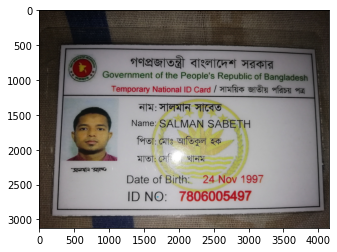

In [5]:
img=cv2.imread("tests/nid1.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
org=np.copy(img)
plt.imshow(org)
plt.show()
# dims
h,w,d=img.shape
# process
img=cv2.resize(img,(256,256))
img=img/255.0
data=np.expand_dims(img,axis=0)


In [6]:
pred=mod.model.predict(data)

In [7]:
pred[0][0]

array([0.9885577 , 0.01144232], dtype=float32)

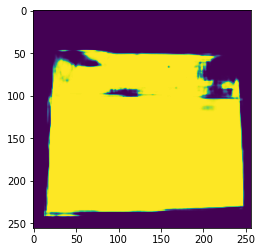

In [8]:
plt.imshow(pred[1][0])

In [9]:
h,w,d=org.shape
p=pred[1][0]
card_map=cv2.resize(p,(w,h))


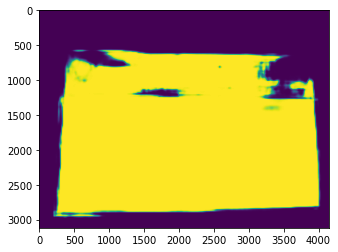

In [17]:
y_min,y_max,x_min,x_max=locateData(card_map,0)
org=org[y_min:y_max,x_min:x_max]
card_map=card_map[y_min:y_max,x_min:x_max]
plt.imshow(card_map)        
         

In [15]:
# find max contour (4 point)
contours, hierarchy = cv2.findContours(card_map.astype("uint8"), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cmax = max(contours, key = cv2.contourArea)
hull=cv2.convexHull(cmax)
for i in range(10):
    epsilon = (i+1)*0.01*cv2.arcLength(hull,True)
    approx = cv2.approxPolyDP(hull,epsilon,True)
    print(approx.shape)
    if approx.shape[-1]==4:
        break

approx=np.reshape(approx,(approx.shape[0],approx.shape[-1]))
approx=approx.astype("float32")
form=np.array([approx[0],approx[3],approx[2],approx[1]])
# warp
org=four_point_transform(org,form)


(5, 1, 2)
(3, 1, 2)
(3, 1, 2)
(3, 1, 2)
(3, 1, 2)
(3, 1, 2)
(3, 1, 2)
(2, 1, 2)
(2, 1, 2)
(2, 1, 2)


IndexError: index 3 is out of bounds for axis 0 with size 2